# P2: Investiganting a dataset

This is the project 2 of the Udacity's Data Analyst Nanodegree. It's build upon the introduction to data analysis course and has the main objectives to use knwoledge on pandas, numpy and matplotlib python libraries at the end-to-end process of data analysis. In this project we're going to go through all the five steps of the data analysis process, such as:

In [281]:
#importing libraries
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set graphs default look
sns.set(style="whitegrid", palette='pastel', color_codes=True, rc={"figure.figsize": (9, 6)})

Populating the interactive namespace from numpy and matplotlib


[]

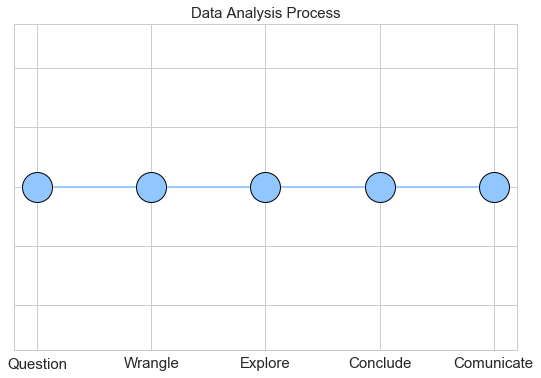

In [283]:
#create data analysis process visualization
process = pd.Series([1, 1, 1, 1, 1], index=['Question', 'Wrangle', 'Explore', 'Conclude', 'Comunicate'])
x = range(5)
plt.xticks(x, process.index)

plt.plot(x, process.values, marker='o', markersize=30, markeredgecolor='black', markeredgewidth=1)
plt.rc('xtick', labelsize=15) 
plt.title('Data Analysis Process', fontsize=15)

#hide y axis label
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_ticklabels([])

# 1. The Dataset
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The key fact is that the ship was carring engough lifeboats for only 1,178 people, raising the question of the survivors patterns. ([wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic))

![titanic](imgs/titanic.jpg)

For this project, it will be investigated the dataset of titanic, with demographic data and informations of 891 out 2,224 passengers and crew on board of the ship. This dataset has information about sex, age, ticket class, if has relatives on board, the port of embarkation and if has survived or not the accident.

## 1.1 Data Dictionary

In [216]:
# read csv file
titanic_df = pd.read_csv('../documents/titanic_data.csv')

In [217]:
# identify dataframe columns and number of rows and columns
print titanic_df.columns
print titanic_df.shape

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')
(891, 12)


The dataset is composed of 891 registries (rows) with 12 variables (columns). The 12 variables are:
* PassengerId
* Survived (0 = No, 1 = Yes)
* Pclass (1 = 1st, 2 = 2nd, 3 = 3rd)
* Name
* Sex
* Age
* SibSp (# of siblings / spouses aboard the Titanic)
* Parch (# of parents / children aboard the Titanic)
* Ticket
* Fare
* Cabin
* Embarked (Port of embarkation)

# 2. Phase 1: Questions
The main question is **what does the survivors have in common?** Was there a pattern between the survivors, such as the wealth, age or sex? Based on the dataset, what can be deduced about the reasons the passengers survived?

To answer this question, some intermediate questions will be considered, such as:
* What is the rate of survivors by age, gender and class?

* Passengers traveling with relatives had more chance to survive?

* The embarkment port had some relation with the survival rate? If so, is it because of the ticket class?

# 3. Phase 2: Wrangle
On this phase it will be conducted several tests to assess the consistensy of the dataset. The following verifications will be performed:
* The type of data matches with expected for the column?
* The values on the columns matches expected?

For the data preparation:

* It will be created a column with the indicator if the person is travelling with or without relatives. This is to investigate if singles had more or less chance to survive. The column name will be is_alone and the values 0 (if with relatives) and 1 (if with out relatives).
* It will be created two columns, with latitude and longitude positions for each embarkment port

## 3.1 The data type matches with expected for the column?

In [218]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [219]:
# check passengers without embarked identifier (NaN)
titanic_df[titanic_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Based on the result of titanic_df.info(), it seems that de data types are suitable. 

**Warnings:**
* Survived could be transformed to boolean but integer will serve the task. It's not allowed any value different of 0 or 1.
* PassengerId and Pclass could be used as object (string), since they are categorical, but it's not a problem to mantain them as integer if not conducted descriptive analysis such as mean(), max(), std(), etc. 
* The Cabin column raises some caution due to the high number of missing values (687 out 891. 77%). It should not be used on our investigation.
* There are 177 missing values on the Age columns, approximately 20%. This can bias conclusions if it is acctualy related to the survivors. Since NaN values are not considered on descriptive calculations, no further actions are required for this column at the moment, just the knowledge that Age operations will not include all the 891 registries.

**Fun fact:**
* There are two port embark missing related to Mrs Martha Evelyn Stone and her maid, Miss Rose Amélie Icard. Rose has registered the accident events on a letter that has became famous later on. ([Rose Amelie Icard letter](http://www.telegraph.co.uk/history/titanic-anniversary/10713889/Titanic-letter-reveals-new-first-hand-account-of-disaster.html))

## 3.2 The values on the columns matches expected?

### 3.2.1 PassengerId consistency

In [220]:
# get number of unique passengers
len(titanic_df.PassengerId.unique())

891

There is no duplicated passenger id.

### 3.2.2 Survived consistency

In [221]:
# get values in Survived column
titanic_df.Survived.unique()

array([0, 1], dtype=int64)

There is no values other than 1 (lived) and 0 (died) on the dataset. 

### 3.2.3 Pclass consistency

In [222]:
# get values in Pclass column
titanic_df.Pclass.unique()

array([3, 1, 2], dtype=int64)

There is no values other than 1, 2, 3. Related to 1st, 2nd and 3rd classes on the ship.

### 3.2.4 Name consistency

In [223]:
# get number of unique name
len(titanic_df.Name.unique())

891

There is no duplicated names on the dataset

### 3.2.5 Sex consistency

In [224]:
# get values in Sex column
titanic_df.Sex.unique()

array(['male', 'female'], dtype=object)

There is no value other than 'male' and 'female' on the dataset.

### 3.2.6 Age consistency

In [225]:
# decriptive statistics about age column
titanic_df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The oldest person is 80 years old and the younger less than a year, the fractional value is due to babies with months of life and xx.5 if it is an estimated age (from [kaggle](https://www.kaggle.com/c/titanic/data)).

### 3.2.7 SibSp consistency

In [226]:
# get values in SibSp column
titanic_df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Let's investigate the biggest family:

In [227]:
# filter SibSp with 8 relatives
titanic_df[titanic_df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


It seems that 4 members of this family are missing of our dataset. By the SibSp and Parch number, this family could be formed by 2 parents and 9 brothers and sisters, and we got only 7 registries. It's not a big problem, since we are using a database with 891 out the 2224 passengers and this column (SibSp) will be used as indicator if relatives had leaded to higher chance of surviving. It is not scope to check what family members had survived, and if they did it together.

### 3.2.8 Parch consistency

In [228]:
# get values in Parch column
titanic_df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

The values are within the expected. Higher numbers indicate a passenger with children and parents or several children.

### 3.2.9 Ticket consistency

In [229]:
# get the number of unique tickets
len(titanic_df.Ticket.unique())

681

It seems that we have less ticket numbers than passengers. It could be strange, but the Titanic tickets that were sold together, like for a family, was registered with the same ticket number ([Titanic tickets](https://www.kaggle.com/c/titanic/discussion/33087)). Let's investigate the biggest family example:

In [230]:
# filter SibSp with 8 relatives
titanic_df.loc[titanic_df['SibSp'] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


All these passengers had the same value for ticket number, meaning that one ticket number had 7 entrees. Repeated ticket numbers are not a problem on the dataset.

### 3.2.10 Fare consistency

In [231]:
# decriptive statistics about fare column
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

The describe function shows a high standard deviation (even bigger than the mean), very high max value and min value equals to 0. Because of the ticket way of selling (several with same number), the max value could be because it represents several tickets. The min value of zero could be that there were some passengers that does not payed the ticket, or it is a missing value incorrectly filled. If it is the second case, our analysis using the fares values would be compromised.

Let's investigate each situation:

In [232]:
# check registries with the highest fare
titanic_df.loc[titanic_df['Fare'] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


The max fare value really represents a 1st class 3 persons ticket with the mean of 170.78 fare per passenger.

In [233]:
# check registries with the lowest fare
titanic_df.loc[titanic_df['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


There is 15 0 Fare on this dataset, some with ticket line. It seems that these are the ship crew and some important people who had acctually gotten a free ride.

### 3.2.11 Cabin consistency
We've already checked that this column has 77% of NaN registries, so it will not be considered in our study.

### 3.2.12 Embarked consistency

In [234]:
# get the values in the embarked column
titanic_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [235]:
# check how many registries has embarked column missing
len(titanic_df.loc[titanic_df['Embarked'].isnull()])

2

As checked on item 3.1, there are two missing values of embarkation port on this dataset. The others are within the range of C, Q, S, representing Cherbourg, Queenstown and Southampton ports.

## 3.3 Data preparation

### 3.3.1 Creation of the column is_alone

In [236]:
# to avoid loop, let's create a function and then call with the apply method for each row
def create_is_alone(df):
    """Get SibSp and Parch values and create new column.
    
    Create column is_alone = 0 if the passenger has relative on
    board or is_alone = 1 if there is no relative on board. For relative is
    considered SibSp (# of siblings / spouses aboard the Titanic) and Parch 
    (# of parents / children aboard the Titanic).
    
    Args:
        df(DataFrame): the titanic DataFrame with the columns SibSp and Parch.
    Returns:
        the new DataFrame with is_alone column created
    """
    if df['SibSp'] == 0 and df['Parch'] == 0:
        df['is_alone'] = 1
    else:
        df['is_alone'] = 0
    return df

# call create_is_alone function for each row with the pandas apply function. axis=1 parameter means for each row
titanic_df = titanic_df.apply(create_is_alone, axis=1)

Check if the function worked propertly:

In [237]:
# compare if is_alone = 1 column matches SibSp and Parch criteria
if (len(titanic_df.loc[(titanic_df['SibSp'] == 0) & (titanic_df['Parch'] == 0)])) \
     - (len(titanic_df.loc[titanic_df['is_alone'] == 1])) == 0:
    print 'ok for alones'

# compare if is_alone = 0 matches SibSp and Parch criteria
if (len(titanic_df.loc[(titanic_df['SibSp'] != 0) | (titanic_df['Parch'] != 0)])) \
    - (len(titanic_df.loc[titanic_df['is_alone'] == 0])) == 0:
    print 'ok for with relatives'

print 'New number of columns is: ', len(titanic_df.columns)

ok for alones
ok for with relatives
New number of columns is:  13


### 3.3.2 Creation of the columns latitude and longitude

On this step, each port it will be associated with latitude and longitude values as following:

* S (50.8965,-1.3968)
* C (49.659072, -1.611729)
* Q (51.851, -8.2967)


In [238]:
# create a dataframe with the S, C and Q coordinates
ports_coordinates = pd.DataFrame({'Embarked' : ['S', 'C', 'Q'],
                              'latitude' : [50.8965, 49.659072, 51.851],
                               'longitude' : [-1.3968, -1.611729, -8.2967],})

# merge the ports coordinates with the titanic datafrmae with the key Embarked
titanic_df = titanic_df.merge(ports_coordinates, on=['Embarked'], how='left')

# 4. Phase 3: Explore
On this phase it will be conducted some exploration on the data to find some insights about the correlation with the passengers information and the result of surviving or not the accident. This phase aims to build some intuition and find patterns.

First let's get some visualization of the data:

In [239]:
# visualize the first 5 records
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_alone,latitude,longitude
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,50.896500,-1.396800
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,49.659072,-1.611729
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,50.896500,-1.396800
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,50.896500,-1.396800
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,50.896500,-1.396800


Using the describe() function on selected columns to get some descriptive statistics about the dataset:

In [240]:
# get descriptive statistics of the entire dataframe with selected columns
titanic_df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'is_alone']].describe()

,Survived,Age,SibSp,Parch,Fare,is_alone
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208,0.602694
std,0.486592,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Some insights:
* 38% of the passenger had survived
* the average of age is 29.70. The oldest has 80 years and younger less than a year
* 60% of the passengers did not have relatives on board
* The most expensive ticket cost was 512.33 but it had more than one person on it

Let's check some graphs for a high level insight about the characteristics of the passengers:

### The distribution of ages on the ship:

mode:  0    24.0
dtype: float64


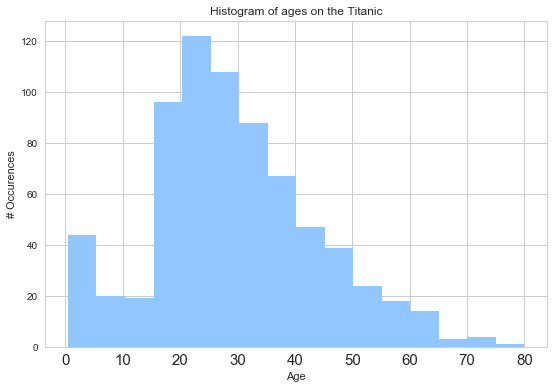

In [241]:
# plot age histogram
titanic_df['Age'].hist(bins=16)
plt.title('Histogram of ages on the Titanic')
plt.xlabel('Age')
plt.ylabel('# Occurences')

print 'mode: ', titanic_df['Age'].mode()

The histogram of the Titanic passenger's age shows a normal distribution with high occurences of kids between 0-5. The higher number of occurences are between 20 and 25 years, with the mode of 24.

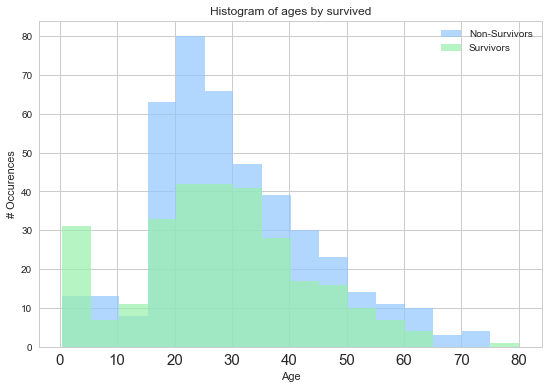

In [242]:
# plot age histogram grouped by survivals
pd.DataFrame({'Non-Survivors': titanic_df.groupby('Survived').get_group(0).Age,
              'Survivors':   titanic_df.groupby('Survived').get_group(1).Age}).plot.hist(bins=16, alpha=.7)
plt.title('Histogram of ages by survived')
plt.xlabel('Age')
plt.ylabel('# Occurences')

When comparing the histogram of ages by those who survived and not the accident its possible to see that the majority of both distributions are similar (as expected if survivors were selected randomly without preferences), but some ages has a higher rate of survivor, such as youngsters. This could be because they gave preference on saving babies and childrens. 

### The distribution of the class on the ship:

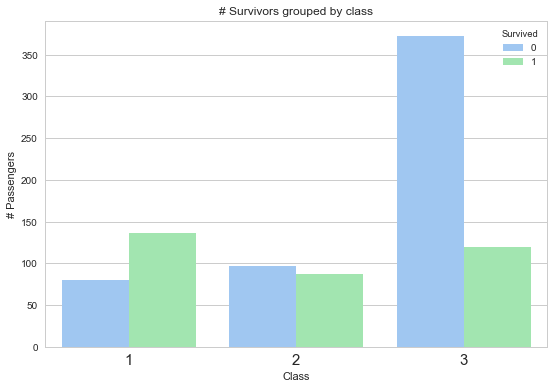

In [243]:
#plot number of passengers survived grouped by class
sns.countplot(x='Pclass', data=titanic_df, hue='Survived')
plt.title('# Survivors grouped by class')
plt.ylabel('# Passengers')
plt.xlabel('Class')

In [244]:
# find the number of passengers by class
titanic_df.groupby(['Pclass'])['PassengerId'].count()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

By the representation above, we can see that the first class had a higher rate of survivors than deaths, the second class had almost the same rate for each category and that the third class computed much more deaths than survives. With 38% rate of survival of the accident, if the survivors were selected without interference, the expected graph was blue bars (deads) approximately 24 points higher than greens (alive).

By this information, it seems that higher classes were selected to survive.

### The distribution of the gender on the ship:

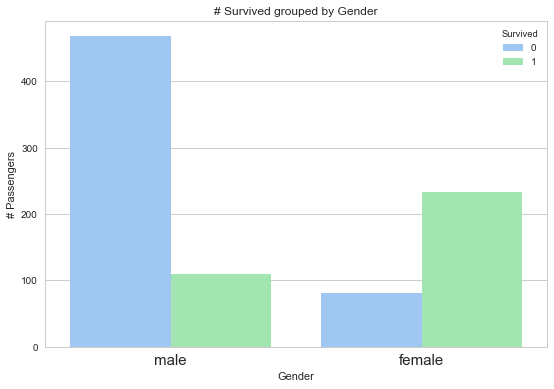

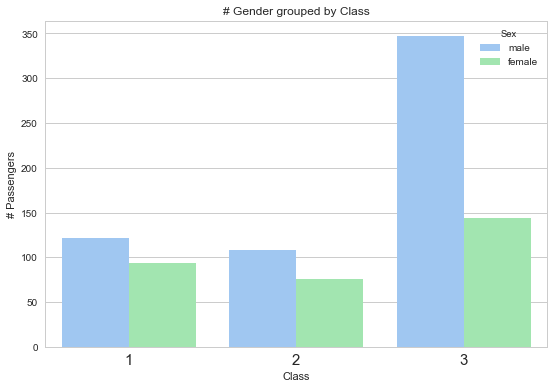

In [245]:
# plot number of passengers survived grouped by gender
plt.subplots()
sns.countplot(x='Sex', data=titanic_df, hue='Survived')
plt.title('# Survived grouped by Gender')
plt.ylabel('# Passengers')
plt.xlabel('Gender')

# plot number of passengers gender grouped by class
plt.subplots()
sns.countplot(x='Pclass', data=titanic_df, hue='Sex')
plt.title('# Gender grouped by Class')
plt.ylabel('# Passengers')
plt.xlabel('Class')

In [246]:
# proportion of Sex on the ship
titanic_df.groupby('Sex')['PassengerId'].count()/len(titanic_df)

Sex
female    0.352413
male      0.647587
Name: PassengerId, dtype: float64

In [247]:
# proportion of survivals and deaths by sex
pd.crosstab(titanic_df['Survived'], titanic_df['Sex']).apply(lambda r: r/r.sum(), axis=1)

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [248]:
# proportion of Sex by Class
pd.crosstab(titanic_df['Pclass'], titanic_df['Sex']).apply(lambda r: r/r.sum(), axis=1)

Sex,female,male
Pclass,,
1,0.435185,0.564815
2,0.413043,0.586957
3,0.293279,0.706721


By these graphs and tables it's possible to see that females had a much higher rate of survival than males. Even the ship having 35% of females, they represent 68% of the survivals. This could be that females were selected to survive.

As verified on the gender exploration above, the higher female survivor rate could be beacuse of a distribution on gender by class. It could be that the first class had more womens hosted and that they survived more because they were on the first class. The graph "#Class grouped by Gender" and the table "proportion of Sex by Class" shows that it was not the case. The classes had more males than females, as expected, with higher gap on the third class.

### The distribution of the families on the ship:

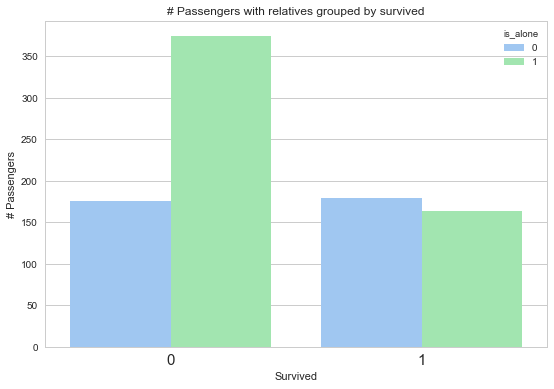

In [249]:
# plot number of passengers is_alone grouped by survived
sns.countplot(x='Survived', data=titanic_df, hue='is_alone')
plt.title('# Passengers with relatives grouped by survived')
plt.ylabel('# Passengers')
plt.xlabel('Survived')

In [250]:
# number of passengers survived by is_alone
pd.crosstab(titanic_df['Survived'], titanic_df['is_alone'], margins=True)

is_alone,0,1,All
Survived,,,
0,175,374,549
1,179,163,342
All,354,537,891


This section aims to identify if passengers with relatives on board had survived more. The expected graph would be higher green bars on both survived and dead, because the ship had 60% of loners and 40% of persons with relatives. But the given graph shows that loners dead more than expected and that passengers with relatives survived more than expected.

### The distribution of the embarked ports on the ship:

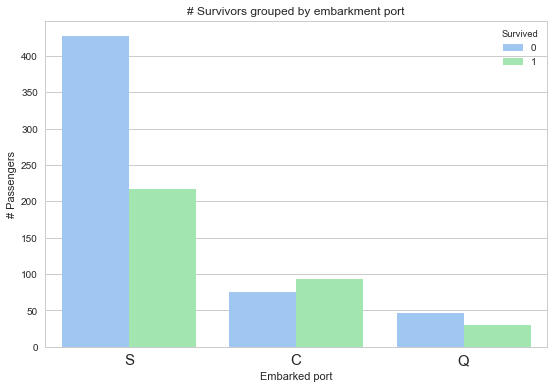

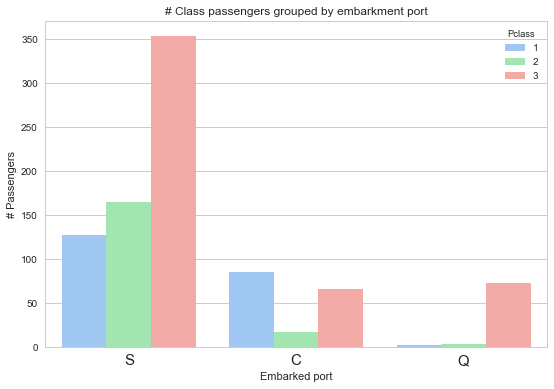

In [251]:
# plot number of passengers gender grouped by survived
plt.subplots()
sns.countplot(x='Embarked', data=titanic_df, hue='Survived')
plt.title('# Survivors grouped by embarkment port')
plt.ylabel('# Passengers')
plt.xlabel('Embarked port')

# plot number of passengers class grouped by embarkment port
plt.subplots()
sns.countplot(x='Embarked', data=titanic_df, hue='Pclass')
plt.title('# Class passengers grouped by embarkment port')
plt.ylabel('# Passengers')
plt.xlabel('Embarked port')

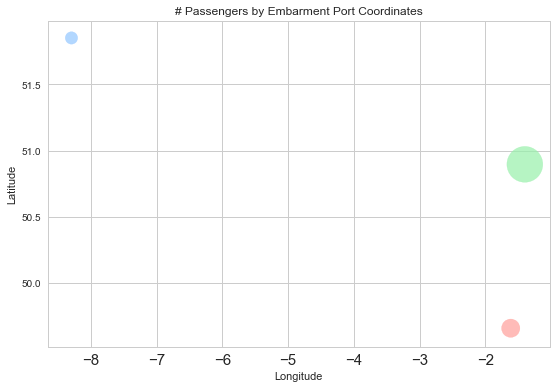

In [252]:
# plot size of passengers by embarkment port on geo coordinates
titanic_df_port = titanic_df.groupby(['latitude', 'longitude'], as_index=False)['PassengerId'].count()
plt.scatter(titanic_df_port['longitude'], titanic_df_port['latitude'], \
            s=titanic_df_port['PassengerId']*2, alpha =.7, c=['r', 'g', 'b'])
plt.title('# Passengers by Embarment Port Coordinates')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

By the scatterplot we can see the concentration of passengers embarked by port. The green dot represents Southampton, on England. On Titanic's schedule, after Southampton the ship went to Cherboug on France (red dot) and Queenstown on Ireland (blue dot). 

![titanic route](imgs/titanic_route.gif)

# 5. Phase 4: Conclusions
By the data explored on phase 3, the most significant unexpected results were:
* Femlaes seems to survive more than males
* Higher classes seems to survive more than lower
* Families seems to survive more than loners

To be sure that these observations are significant and not due by chance, it's necessary to run inferential statistics test to prove the hypothesis. All these situations has categorical data, such as male/female, dead/alive, and so on. Therefore, t-tests and ANOVA are not suited because they use numerical data. For categorical data, does not make sense to calculate mean and standard deviation. To verify correlation between categorical data it's used the $\chi^2$ statistical test. Because all of the three cenarios have two nominal variables, the type of $\chi^2$ test to be conducted is *Independence*.

On the next sessions, it will be conducted the $\chi^2$ test for each one of the unexpected results with the objective of drawing conclusions with statistical significance.

First, let's ensure that the assumptions and restrictions for $\chi^2$ test are matched on these cenarios:
* Avoid dependent observations
    * _Ok, each passenger is an independent observation_
* Avoid small expected frequencies (n > 20 and expected cell frequency >= 5)
    * _Ok, n = 891 and cell frequencies are higher than 100_

### Analysis Limitations

There are some limitations on the present study. The following conclusions are based on a set of the entire Titanic crew and tripulation (891 of 2,224). Therefore, it could be that the results that this dataset presents does not represent the entire Titanic population. Further on, on section 3 we detected that there were approximately 77% of missing values of cabin information and about 20% of Ages missing values. The lack of information could lead us to incorrect conclusions and it's a situation that should be pointed out.

Lastly, lurking variables (hidden variables) could be affecting the survival results. For example, the health or strength of the passengers or the local on the ship they were when the accident happened could had affected the survival result, but these informations are not available to evaluate.

## 5.1 Chi-squared test for independence between survivors and gender

### Variables
* The dependent variable is if the passenger had survived or not
* The independent variable is the gender of the passenger

### Hypothesis
* $H_0$: Gender and survival rates are independent
* $H_a$: Females were prioritized to survive the accident

Step 1: prepare the dataframe to apply the test

In [253]:
# resume the quantitatives by gender and survived
gender_survivors = pd.crosstab(titanic_df.Survived, titanic_df.Sex, margins=True)
gender_survivors.columns = ['female', 'male', 'row_totals']
gender_survivors.index = ['dead', 'survived', 'col_totals']

In [254]:
gender_survivors

,female,male,row_totals
dead,81,468,549
survived,233,109,342
col_totals,314,577,891


Step 2: Compute the $\chi^2$ statistic

In [255]:
#code adapted from http://hamelg.blogspot.com.br/2015/11/python-for-data-analysis-part-25-chi.html

#compute chi squared
def compute_chi_squared(data):
    """Compute chi-squared statistic of a given DataFrame.
    
    Args:
        data(DataFrame): DataFrame with frequencies of occurrences of each cell and totals on last column and row
    Returns:
        chi-squared statistic value
    """
    #find expected values for each cell
    expected =  np.outer(data['row_totals'][0:len(data.index)], \
                     data.loc['col_totals'][0:len(data.columns)]) / float(data.iloc[(len(data.index)-1), (len(data.columns)-1)]) #float function to force decimal points

    #give name for the expected dataframe index and columns
    expected = pd.DataFrame(expected)
    expected.columns = data.columns
    expected.index = data.index
    
    #prepare the observed values without the columns and rows totals
    observed = data.iloc[:(len(data.index)-1),:(len(data.columns)-1)]
    
    #compute chi-squared
    chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()

    return chi_squared_stat

In [256]:
# call function to compute chi squared
chi_squared_stat = compute_chi_squared(gender_survivors)
print chi_squared_stat

263.050574071


Step 3: Identify $\chi^2$ critical value for $\alpha = 0.05$ and $df = 1$ and compute p-value

$df = (number of columns - 1) * (number of rows - 1)$

$df = (2-1) * (2-1) = 1$

In [257]:
#import library and get chi square critical value
import scipy.stats as stats

critical_value = stats.chi2.ppf(q=0.95, df=1) #find critical value for 95% confidence and degree of freedom = 1
print critical_value

3.84145882069


In [258]:
# compute p-value
p_value = 1-stats.chi2.cdf(x=chi_squared_stat, df=1) #compute p_value for chi squared statistic and df = 1
print p_value

0.0


**Step 4: Conclusion**

The $\chi^2$ statistic is higher than the $\chi^2$ critical value for an $\alpha$ level of $0.05$ ($263.05 > 3.84$). This means that the probability of get the $\chi^2$ is less than $5$%, actually it is less than $0.0001$. Because of this, the statistical decision is to **reject the null hypothesis**, meaning that gender and survival rates are not independent of each other and the chances of surviving the accident was related with gender (females had more chance of surviving).

## 5.2 Chi-squared test for independence between survivors and class (Pclass)

### Variables
* The dependent variable is if the passenger had survived or not
* The independent variable is the class the passenger was

### Hypothesis
* $H_0$: Class and survival rates are independent
* $H_a$: Higher classes were prioritized to survive the accident

Step 1: prepare the dataframe to apply the test

In [259]:
# resume the quantitatives by class and survived
class_survivors = pd.crosstab(titanic_df.Survived, titanic_df.Pclass, margins=True)
class_survivors.columns = ['1st', '2nd', '3rd', 'row_totals']
class_survivors.index = ['dead', 'survived', 'col_totals']

In [260]:
class_survivors

,1st,2nd,3rd,row_totals
dead,80,97,372,549
survived,136,87,119,342
col_totals,216,184,491,891


Step 2: Compute the $\chi^2$ statistic

In [261]:
# call function to compute chi squared
chi_squared_stat = compute_chi_squared(class_survivors)
print chi_squared_stat

102.888988757


Step 3: Identify $\chi^2$ critical value for $\alpha = 0.05$ and $df = 2$ and compute p-value

$df = (number of columns - 1) * (number of rows - 1)$

$df = (3-1) * (2-1) = 2$

In [262]:
#get chi square critical value
critical_value = stats.chi2.ppf(q=0.95, df=2) #find critical value for 95% confidence and degree of freedom = 2
print critical_value

5.99146454711


In [263]:
# compute p-value
p_value = 1-stats.chi2.cdf(x=chi_squared_stat, df=1) #compute p_value for chi squared statistic and df = 1
print p_value

0.0


**Step 4: Conclusion**

The $\chi^2$ statistic is higher than the $\chi^2$ critical value for an $\alpha$ level of $0.05$ ($102.89 > 5.99$). This means that the probability of get the $\chi^2$ is less than $5$%, actually it is less than $0.0001$. Because of this, the statistical decision is to **reject the null hypothesis**, meaning that class and survival rates are not independent of each other and the chances of surviving the accident was related with class (higher classes had more chance of surviving).

## 5.3 Chi-squared test for independence between survivors and loners (is_alone)

### Variables
* The dependent variable is if the passenger had survived or not
* The independent variable is alone or with relatives

### Hypothesis
* $H_0$: passengers with relatives and survival rates are independent
* $H_a$: passengers with relatives were prioritized to survive the accident

Step 1: prepare the dataframe to apply the test

In [264]:
# resume the quantitatives by is_alone and survived
relatives_survivors = pd.crosstab(titanic_df.Survived, titanic_df.is_alone, margins=True)
relatives_survivors.columns = ['relatives', 'alone', 'row_totals']
relatives_survivors.index = ['dead', 'survived', 'col_totals']

In [265]:
relatives_survivors

,relatives,alone,row_totals
dead,175,374,549
survived,179,163,342
col_totals,354,537,891


Step 2: Compute the $\chi^2$ statistic

In [266]:
# call function to compute chi squared
chi_squared_stat = compute_chi_squared(relatives_survivors)
print chi_squared_stat

36.8501308475


Step 3: Identify $\chi^2$ critical value for $\alpha = 0.05$ and $df = 1$ and compute p-value

$df = (number of columns - 1) * (number of rows - 1)$

$df = (2-1) * (2-1) = 1$

In [267]:
#get chi square critical value
critical_value = stats.chi2.ppf(q=0.95, df=1) #find critical value for 95% confidence and degree of freedom = 1
print critical_value

3.84145882069


In [268]:
# compute p-value
p_value = 1-stats.chi2.cdf(x=chi_squared_stat, df=1) #compute p_value for chi squared statistic and df = 1
print p_value

1.27567523212e-09


**Step 4: Conclusion**

The $\chi^2$ statistic is higher than the $\chi^2$ critical value for an $\alpha$ level of $0.05$ ($36.85 > 3.84$). This means that the probability of get the $\chi^2$ is less than $5$%, actually it is less than $0.0001$. Because of this, the statistical decision is to **reject the null hypothesis**, meaning that passengers with relatives and survival rates are not independent of each other and the chances of surviving the accident was related with passengers with relatives (passengers with relatives had more chance of surviving).

# 6. Phase 5: Communicate

The central plot of the Titanic accident is that there were not enough lifeboats to save everyone. For a 2,224 passengers and crew on board, there were lifeboats to save only 1,178 peoples and just 706 had survived. For our dataset, it is a 38.4% of survival rate.

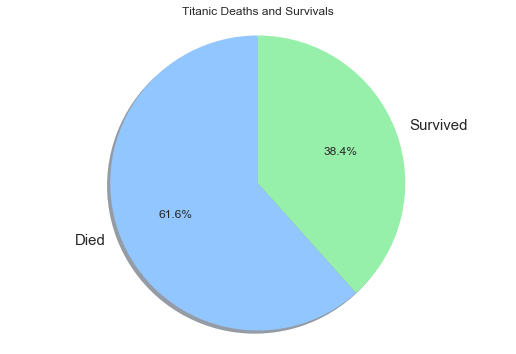

In [269]:
# plot percentage of deaths and survivals
titanic_survived = titanic_df.groupby('Survived')['PassengerId'].count()
plt.pie(titanic_survived, labels=['Died', 'Survived'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Titanic Deaths and Survivals')

Because of this situation, the crew and tripulation on board had faced a dilemma, who should be saved?


![titanic dilema](imgs/titanic_dilema.jpg)

Based on our data set, they had choosen females, wealthiers and families. Here some facts about the accident that support this statement:

### _Almost $75$% of the females on board were saved, while males represents only $19$%. _

In [270]:
# filters number of females and males that survived and died
females_survived = titanic_df.loc[titanic_df['Sex'] == 'female'].groupby('Survived').PassengerId.count()
males_survived = titanic_df.loc[titanic_df['Sex'] == 'male'].groupby('Survived').PassengerId.count()

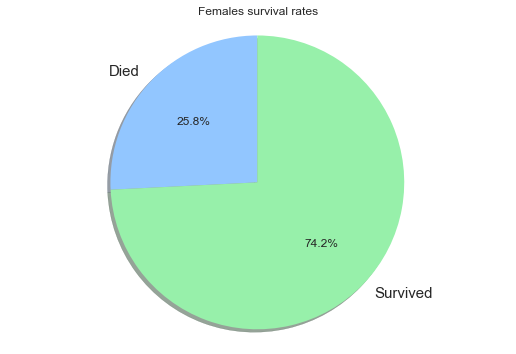

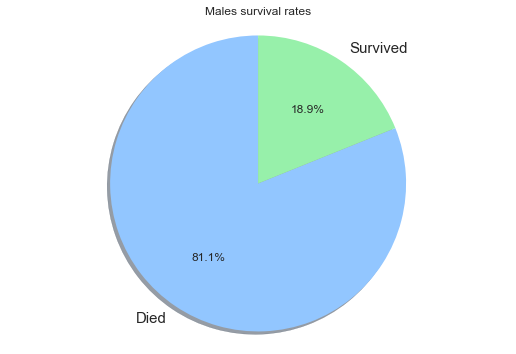

In [271]:
# plot percentage of females survivals
plt.subplots()
plt.pie(females_survived, autopct='%1.1f%%', labels=['Died', 'Survived'], shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Females survival rates')

# plot percentage of males survivals
plt.subplots()
plt.pie(males_survived, autopct='%1.1f%%', labels=['Died', 'Survived'], shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Males survival rates')

### _$63$% of First class <font color='red' size=5> higher than </font> $47$% of Second class <font color='red' size=5> higher than </font> $24$% of Third class had survived_

### _Females $>$ Males and 1st $>$ 2nd $>$ 3rd chance to survive_

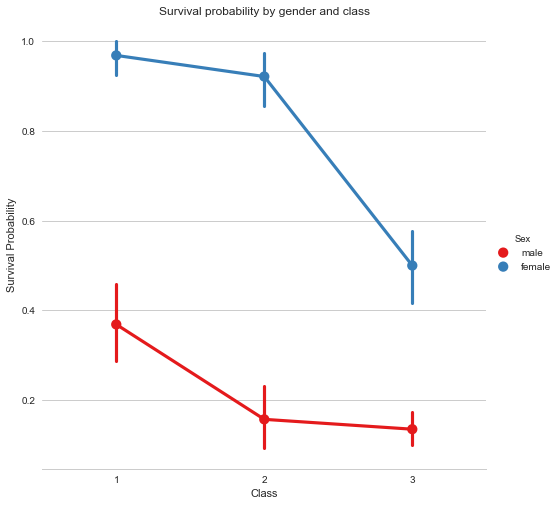

In [272]:
# plot probability of surviving by gender and class
sns.set(style="whitegrid")

g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, size=7, palette='Set1')
g.despine(left=True)
g.set_ylabels('Survival Probability')
g.set_xlabels('Class')
plt.title('Survival probability by gender and class')

In [273]:
# compute survivals rate by class
class_survivors = pd.crosstab(titanic_df.Survived, titanic_df.Pclass).apply(lambda r: r/r.sum(), axis=0)
class_survivors.columns = ['1st', '2nd', '3rd']
class_survivors.index = ['dead', 'survived']

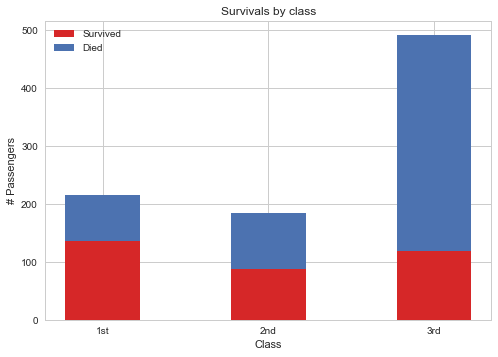

In [274]:
# plot stacked bars by class

# number of passengers died by class
died_by_class = titanic_df.loc[titanic_df['Survived'] == 0].groupby('Pclass').PassengerId.count() 

# number of passengers survived by class
survived_by_class = titanic_df.loc[titanic_df['Survived'] == 1].groupby('Pclass').PassengerId.count()

ind = [1, 2, 3]    # the x locations for the groups
width = 0.45       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, survived_by_class, width, color='#d62728')
p2 = plt.bar(ind, died_by_class, width, bottom=survived_by_class)

plt.title('Survivals by class')
plt.xticks(ind, ('1st', '2nd', '3rd'))
plt.xlabel('Class')
plt.ylabel('# Passengers')
plt.legend((p1[0], p2[0]), ('Survived', 'Died'))

In [275]:
class_survivors

,1st,2nd,3rd
dead,0.37037,0.527174,0.757637
survived,0.62963,0.472826,0.242363


### $50$% of the passengers with relatives on board had survived compared with $30$% of the passengers without relatives

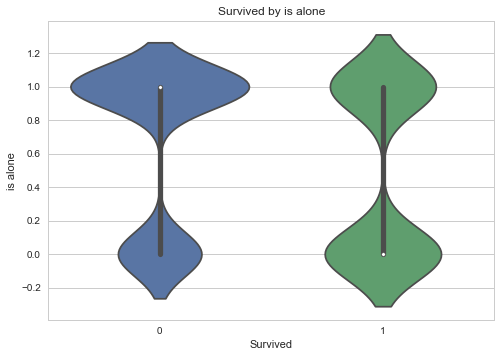

In [276]:
# plot survived by is_alone
sns.violinplot(x='Survived', y='is_alone', data=titanic_df, split=True)
plt.title('Survived by is alone')
plt.xlabel('Survived')
plt.ylabel('is alone')

In [277]:
# compute survivals rate by relatives
relatives_survivors = pd.crosstab(titanic_df.Survived, titanic_df.is_alone).apply(lambda r: r/r.sum(), axis=0)
relatives_survivors.columns = ['relatives', 'alone']
relatives_survivors.index = ['dead', 'survived']

In [278]:
relatives_survivors

,relatives,alone
dead,0.49435,0.696462
survived,0.50565,0.303538


# References


* [Titanic dataset](https://www.kaggle.com/c/titanic/data)

* [Titanic wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)

* [Titanic kaggle kernel tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)

* [Titanic tickets fare](https://www.kaggle.com/c/titanic/discussion/33087)

* [Rose Amelie Icard letter](http://www.telegraph.co.uk/history/titanic-anniversary/10713889/Titanic-letter-reveals-new-first-hand-account-of-disaster.html)

* [Titanic Sage family](http://www.bbc.com/news/uk-england-cambridgeshire-17596264)

* [Titanic timeline](http://www.titanicfacts.net/titanic-maiden-voyage.html)

* [Matplotlib plot x axis with string](https://stackoverflow.com/questions/7559242/matplotlib-strings-as-labels-on-x-axis)

* [Matplotlib hide axis values](https://codeyarns.com/2015/06/29/how-to-hide-axis-of-plot-in-matplotlib/)

* [Matlplotlib stacked histograms](https://stackoverflow.com/questions/41622054/stacked-histogram-of-grouped-values-in-pandas)

* [Seaborn violin plot](https://seaborn.pydata.org/examples/grouped_violinplots.html)

* [Seaborn categorical plots](https://seaborn.pydata.org/tutorial/categorical.html)

* [Seaborn factor plot](https://seaborn.pydata.org/examples/factorplot_bars.html)

* [Seaborn color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)

* [Seaborn countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)

* [Chi squared statistic with python](http://hamelg.blogspot.com.br/2015/11/python-for-data-analysis-part-25-chi.html)

* [Lurking and confounding variables](http://web.archive.org/web/20161013204311/https://onlinecourses.science.psu.edu/stat200/node/122)

* [Google Python Styleguide](https://google.github.io/styleguide/pyguide.html?showone=Comments#Comments)

* [PEP 257 - Docstring conventions](https://www.python.org/dev/peps/pep-0257/)